<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="mobile.jpg">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=24px>
                    <b>Market Positioning Of Mobiles
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement

There is a new mobile company and the CEO wants to give tough fight to big companies like Apple,Samsung etc.

He has no idea of how to estimate price of mobiles his company creates. A simple assumption of the prices will not be profitable in this competitive world. To solve this problem he collects sales data of mobile phones of various companies.

Thus, the CEO has hired you to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price.
You have to predict a price range indicating how high the price is.

## Data Definition

**battery_power:** Total energy a battery can store in one time measured in mAh<br> 

**clock_speed:** Speed at which microprocessor executes instructions<br>

**fc:** Front Camera mega pixels<br>

**int_memory:** Internal Memory in Gigabytes<br>

**m_dep:** Mobile Depth in cm<br>

**mobile_wt:** Weight of mobile phone<br>

**n_cores:** Number of cores of processor<br>

**pc:** Primary Camera mega pixels<br>

**px_height:** Pixel Resolution Height<br>

**px_width:** Pixel Resolution Width<br>

**ram:** Random Access Memory in Mega Bytes<br>

**sc_h:** Screen Height of mobile in cm<br>

**sc_w:** Screen Width of mobile in cm<br>

**talk_time:** longest time that a single battery charge will last when you are<br>

**price_range:** This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

## Table of Content

1. **[Import Libraries](#import_lib)**
2. **[Set Options](#set_options)**
3. **[Read Data](#RD)**
4. **[Data Analysis and Preparation](#data_preparation)**
    - 4.1 - **[Understand the Dataset](#Data_Understanding)**
        - 4.1.1 - **[Data Type](#Data_Types)**
        - 4.1.2 - **[Summary Statistics](#Summary_Statistics)**
        - 4.1.3 - **[Distribution of Variables](#distribution_variables)**
        - 4.1.4 - **[Correlation](#correlation)**
        - 4.1.5 - **[Discover Outliers](#outliers)**
        - 4.1.6 - **[Missing Values](#Missing_Values)**      
    - 4.2 - **[Prepare the Data](#Data_Preparation)**
5. **[KNN](#knn)**

<a id='import_lib'></a>
# 1. Import Libraries

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Import the required libraries and functions</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# import various functions to perform classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score 

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

<a id='set_options'></a>
# 2. Set Options

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Now we make necessary changes to :<br><br>
1. Display complete data frames<br>
2. To avoid the exponential number<br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

<a id='RD'></a>
# 3. Read Data

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Read and display data to get an insight into the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
# read csv file using pandas
df_mobile = pd.read_csv('Mobile_data.csv')

# display the top 5 rows of the dataframe
df_mobile.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


#### Lets take a glance at our dataframe and see how it looks

#### Dimensions of the data

In [5]:
# 'shape' function gives the total number of rows and columns in the data
df_mobile.shape

(2000, 15)

<a id='data_preparation'></a>
# 4. Data Analysis and Preparation

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Data preparation is the process of cleaning and transforming raw data before building predictive models. <br><br>
                        Here, we analyze and prepare data to perform classification techniques:<br>
                        1. Check data types. Ensure your data types are correct. Refer data definitions to validate <br>
                        2. If data types are not as per business definition, change the data types as per requirement <br>
                        3. Study summary statistics<br>
                        4. Distribution of variables<br>
                        5. Study correlation<br>
                        6. Detect outliers<br>
                        7. Check for missing values<br><br>
                        Note: It is an art to explore data, and one needs more and more practice to gain expertise in this area
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Data_Understanding'></a>
## 4.1 Understand the Dataset

<a id='Data_Types'></a>
### 4.1.1 Data Type
The main data types in Pandas dataframes are the object, float, int64, bool, and datetime64. To understand each attribute of our data, it is always good for us to know the data type of each column.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In our dataset, we have numerical and categorical variables. The numeric variables should have data type 'int'/'float' while categorical variables should have data type 'object'.<br><br> 
                        1. Check for the data type <br>
                        2. For any incorrect data type, change the data type with the appropriate type<br>
                        3. Recheck for the data type
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Check for the data type**

In [6]:
# 'dtypes' gives the data type for each column
df_mobile.dtypes

battery_power      int64
clock_speed      float64
fc                 int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
price_range        int64
dtype: object

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the above output, it is clear that the data type of all the variables except 'clock_speed' and 'm_dep' is int64. The data type of 'clock_speed' and 'm_dep' is float64.<br><br></b>
                </font>
            </div>
        </td>
    </tr>
</table>




In [7]:
df_mobile.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>For convenience, we shall split the target variable from the data frame.
Let dataframe 'df_target' be the dataframe containing the dependent variable and dataframe 'df_features' be the set of all independent variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# splitting features and the target variable
# consider all the columns except 'RGD' using 'iloc'
df_features = df_mobile.iloc[:, df_mobile.columns != 'price_range']

# consider the target variable
df_target = df_mobile.iloc[:, df_mobile.columns == 'price_range']

Use the dataframe containing features (df_features) for further analysis.

<a id='Summary_Statistics'></a>
### 4.1.2 Summary Statistics

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> In our dataset, we have both numerical and categorical variables. Now we check for summary statistics of all the variables.<br><br>
                        1. For numerical variables, use the describe()<br>
                        2. For categorical variables, use the describe(include=object) 
                        </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. For numerical variables, use the describe()**

In [9]:
# the describe() returns the statistical summary of the variables
# by default, it returns the summary of numerical variables
df_features.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
<b>The above output illustrates the summary statistics of all the numeric variables namely mean, median (50%), standard deviation, minimum, and maximum values, along with the first and third quantiles.<br>
For example, the average battery life of the mobile phones is around 1238 mAh<br><br>
It can be seen that the variables have count equal to the number of observations. This means that there are no missing values in any of the column.</b>  
                    </font>
            </div>
        </td>
    </tr>
</table>

<a id='distribution_variables'></a>
### 4.1.3 Distribution of Variables

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Check the distribution of all the variables <br><br>
                        1. Distribution of numeric independent variables<br>
                        2. Distribution of categoric independent variables<br>
                        3. Distribution of dependent variable
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### 1. Distribution of numeric independent variables.

For the independent numeric variables, we plot the histogram to check the distribution of the variables.

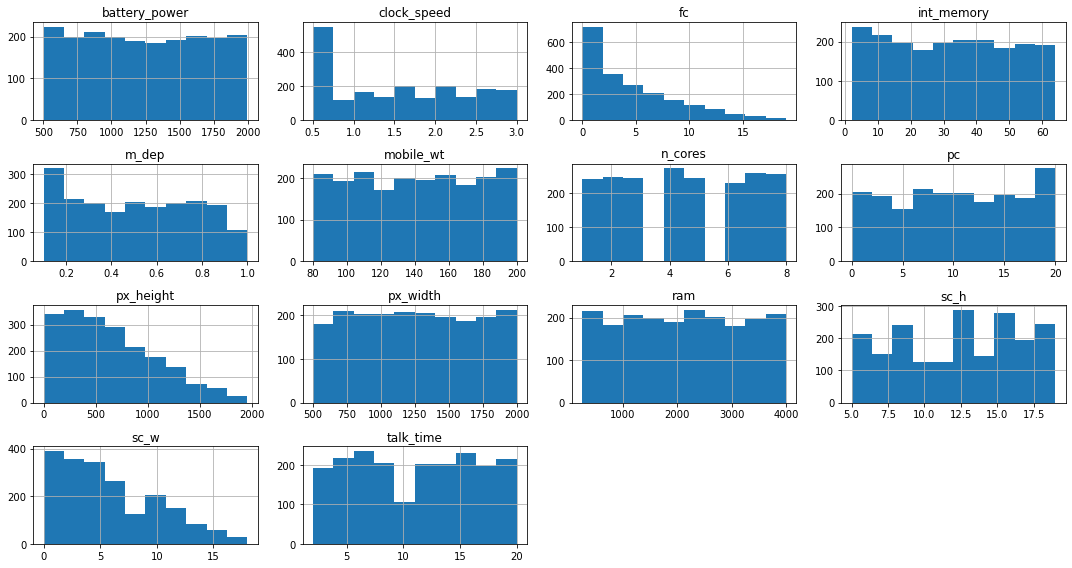

In [10]:
# plot the histogram of numeric independent variables
# the hist() function considers the numeric variables only, by default
df_features.hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> It can be seen that the variables 'fc', 'px_height', and 'sc_w' are right-skewed.<br> <br> 
                        Other variables show no particular pattern of distribution.  
                     </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### 2. Distribution of dependent variable.

In section 4.1.1, we have split the dependent variable (RGD) and created a dataframe 'df_target'. Use this dataframe to check the distribution of RGD.

In [11]:
# get counts of 0's, 1's, 2's and 3's in the 'price_range' variable using 'value_counts()'
# store the values in 'class_frequency'
class_frequency = df_target.price_range.value_counts()
class_frequency

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>There are equal observations in each class thus we see that there is a perfect balance between the four classes of the target variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Group the dataframe by the price range

#### Generally, customers mainly look for ram while purchasing mobile. So, lets see what is the relation between ram and price_range

In [12]:
price_group = df_mobile.groupby('price_range')

In [13]:
# find the average ram in each price group
price_group['ram'].mean()

price_range
0     785.314
1    1679.490
2    2582.816
3    3449.232
Name: ram, dtype: float64

<AxesSubplot:xlabel='price_range', ylabel='ram'>

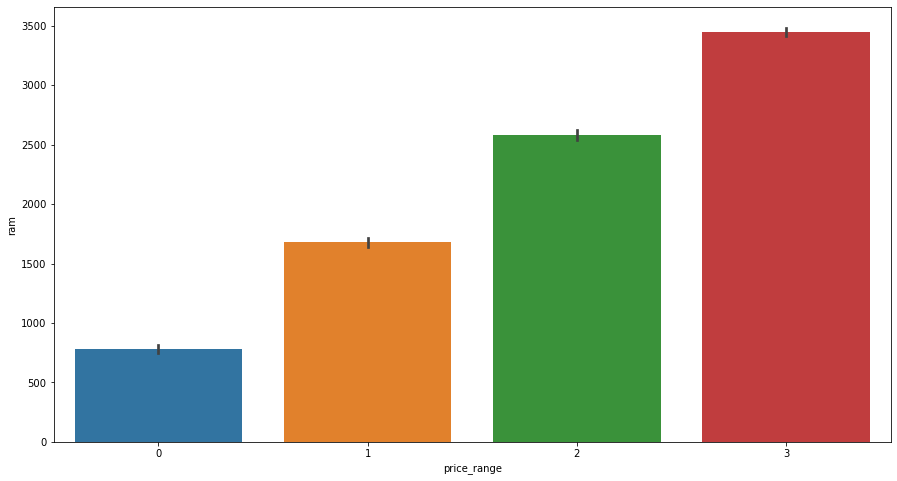

In [14]:
# create a barplot for price_range and ram
sns.barplot('price_range', 'ram', data=df_mobile)

**Interpretation:** The price of the mobile increases as the ram increases.

<a id='outliers'></a>
### 4.1.5 Discover Outliers 

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>To detect outliers in numeric data, we perform the following:<br><br>
                    1. Plot the boxplot for numeric data<br>
                    2. Note the variables in which outliers are present<br>
                    3. Remove outliers by IQR method<br> 
                    4. Plot the boxplot to recheck for outliers</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Plot the boxplot for numeric data**

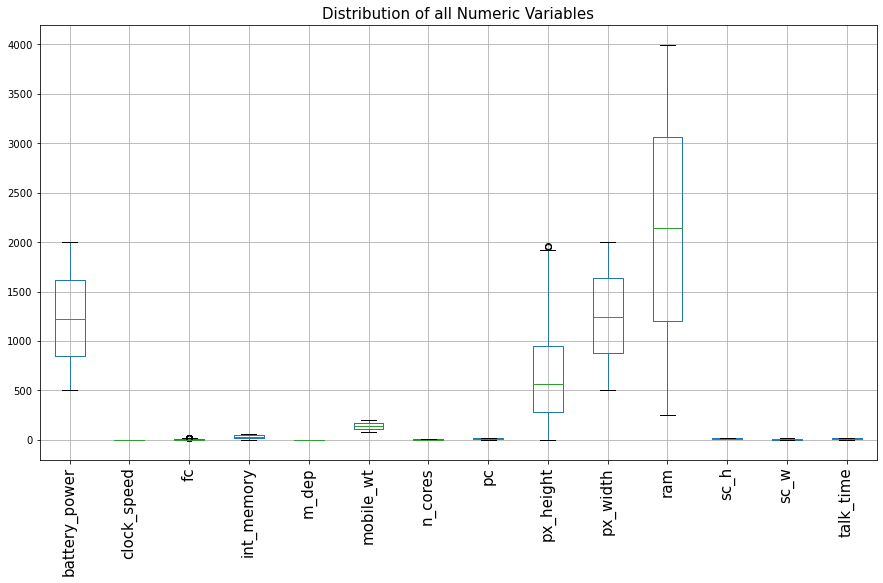

In [15]:
# plot a boxplot to visualize the outliers in all the numeric variables
df_features.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

#### Some boxplots of variables are not seen because of the extreme values im other variables. So let's plot a separate boxplot for these variables

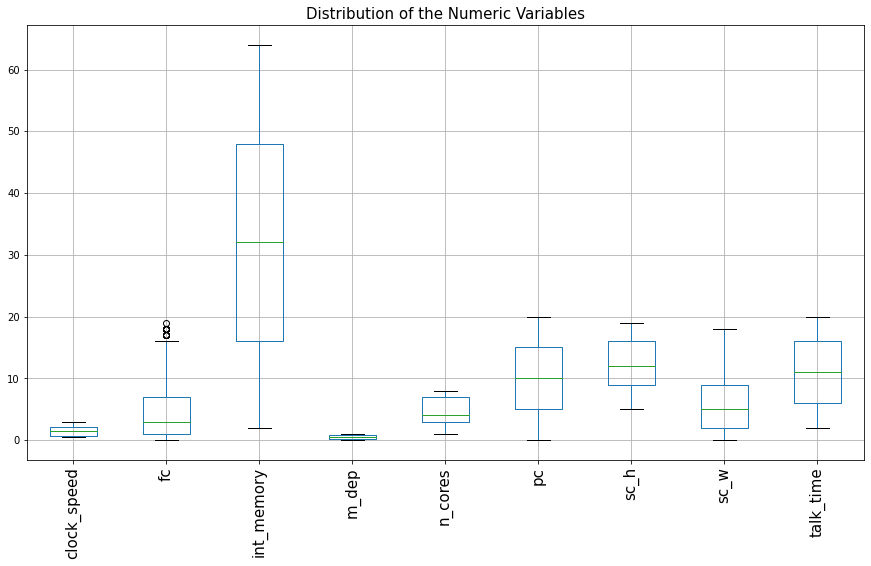

In [16]:
# plot a boxplot to visualize the outliers in all the numeric variables
df_features.drop(['battery_power', 'mobile_wt', 'px_height', 'px_width', 'ram'], axis = 1).boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of the Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

**We can see that only 'fc' and 'px_height' have a few outliers. But they are not visible clearly. So we will plot separate boxplots for these two. Otherwise all the other variables do not have any outliers**

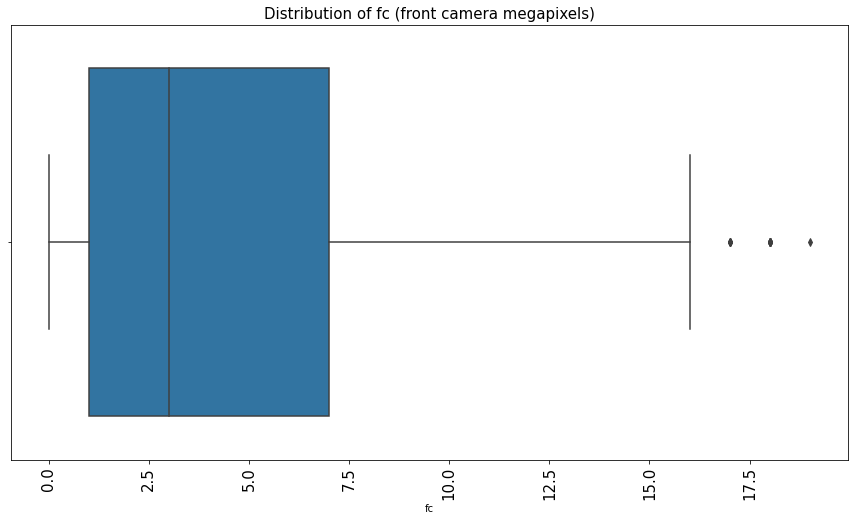

In [17]:
# plot boxplots for fc
sns.boxplot(df_features['fc'])

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of fc (front camera megapixels)', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

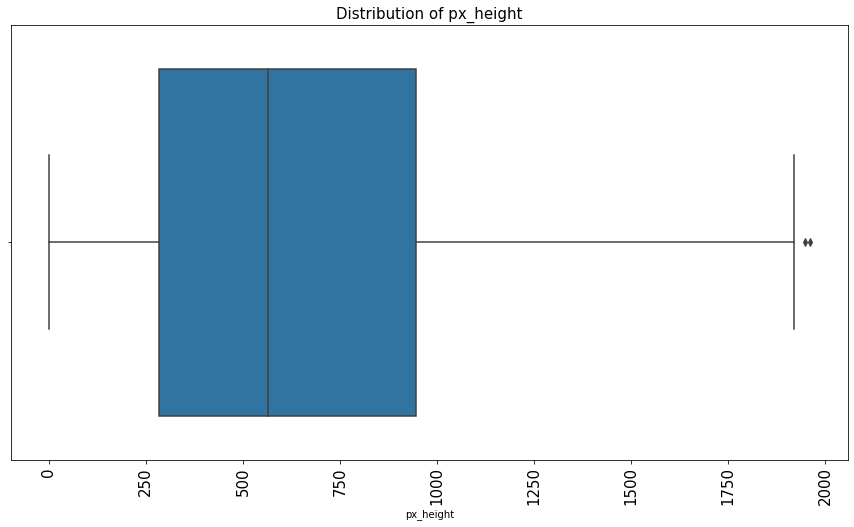

In [18]:
# plot boxplots for fc
sns.boxplot(df_features['px_height'])

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of px_height', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

**2. Note the variables for which outliers are present**

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the above plot, we notice that for the variables 'fc' and 'px_height' there are points above the upper extreme or below the lower extreme - these points are outliers in the data. However, the exact location of these points is not precisely seen.<br><br>
                        Let us use the IQR method to remove the outliers.<br><br>
                        Note: The variables have not been scaled. Thus the boxplots are not visualized efficiently.</b>
                </font>
            </div>
        </td>
    </tr>
</table>



**3. Remove outliers by IQR method**

In [19]:
# calculate the first quartile
Q1 = df_features.quantile(0.25)

# calculate the third quartile
Q3 = df_features.quantile(0.75)

# Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

battery_power     763.50
clock_speed         1.50
fc                  6.00
int_memory         32.00
m_dep               0.60
mobile_wt          61.00
n_cores             4.00
pc                 10.00
px_height         664.50
px_width          758.25
ram              1857.00
sc_h                7.00
sc_w                7.00
talk_time          10.00
dtype: float64


In [20]:
# remove the outliers from the dataframe 'df_mobile'
# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
df_mobile = df_mobile[~((df_mobile < (Q1 - 1.5 * IQR)) | (df_mobile > (Q3 + 1.5 * IQR))).any(axis=1)]

# reset the index of the dataframe without outliers
df_mobile = df_mobile.reset_index(drop = True)

To confirm that the outliers have been removed; let us visualize the boxplot again.

**4. Plot the boxplot to recheck for outliers**

We plot the boxplots for all variables except for the variable `white corpuscle` for better visualization.

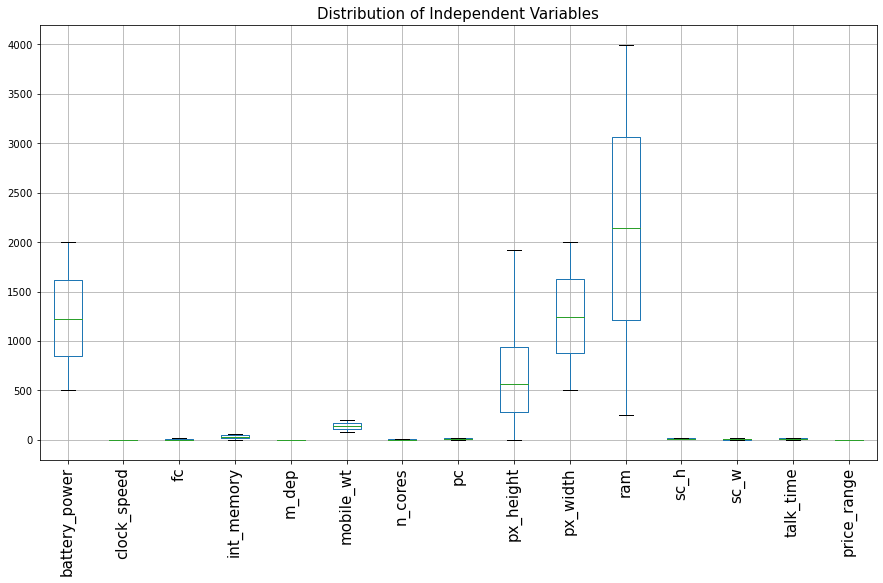

In [21]:
# plot multiple boxplots
df_mobile.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Independent Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

Observing the range of the boxplot, we say that the outliers are removed from the original data.

A crude way to know whether the outliers have been removed or not is to check the dimensions of the data. If the dimensions are reduced that implies outliers are removed.

In [22]:
# check the shape of the data after removal of outliers 
df_mobile.shape

(1980, 15)

<table align="left">
    <tr>
        <td width="8%">
           <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The output shows a reduction in the number of rows. Thus we may say that the potential outliers have been removed.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Missing_Values'></a>
### 4.1.6 Missing Values

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>First, run a check for the presence of missing values and their percentage for each column. Then choose the right approach to remove them.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_mobile.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_mobile.isnull().sum()*100/df_mobile.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
battery_power,0,0.0
clock_speed,0,0.0
fc,0,0.0
int_memory,0,0.0
m_dep,0,0.0
mobile_wt,0,0.0
n_cores,0,0.0
pc,0,0.0
px_height,0,0.0
px_width,0,0.0


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>There are no missing values.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

We plot a heatmap for visualization of missing values.

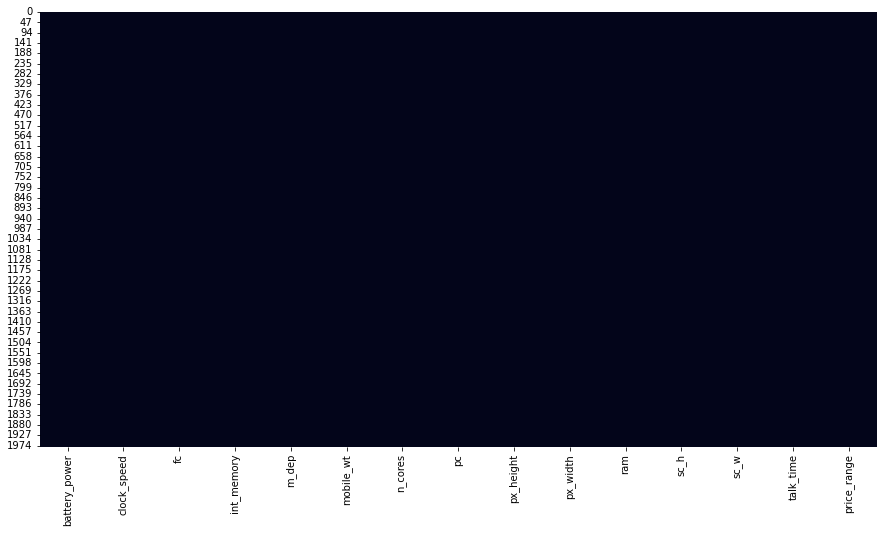

In [24]:
# plot heatmap to check null values
# 'cbar = False' does not show the color axis 
sns.heatmap(df_mobile.isnull(), cbar=False)

# display the plot
plt.show()

The horizontal lines in the heatmap correspond to the missing values. But there are no such line. This means there are no missing values.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Separate the target variable from the independent variables</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
# store the target variable in the variable 'y'
y = df_mobile.price_range

# drop the target variable from the dataframe
df_mobile = df_mobile.drop('price_range', axis = 1)

<a id='Data_Preparation'></a>
## 4.2 Prepare the Data

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Scale the numeric variables</b>
                </font>
            </div>
        </td>
    </tr>
</table>

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [26]:
# scale all the numerical columns
# standardize all the columns of the dataframe 'df_feature'
df_num = df_mobile.apply(lambda rec: (rec - rec.mean()) / rec.std())

df_num.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,-0.897248,0.830652,-0.765253,-1.382209,0.338657,1.351754,-1.103004,-1.300985,-1.411916,-1.143741,0.390818,-0.787936,0.281378,1.465078
1,-0.490030,-1.249531,-1.005152,1.155467,0.685011,-0.117795,-0.666564,-0.636909,0.599639,1.710709,0.466425,1.112614,-0.636461,-0.733510
2,-1.531961,-1.249531,-0.525354,0.493465,1.377719,0.136550,0.206317,-0.636909,1.413354,1.080506,0.440608,-0.312799,-0.865920,-0.367079
3,-1.413663,1.197743,-1.005152,-1.216708,1.031365,-0.259098,0.642758,-0.138852,1.306525,1.242690,0.593666,0.875045,0.510837,-0.000648
4,1.329935,-0.392985,2.113534,0.658966,0.338657,0.023508,-1.103004,0.691243,1.288342,-0.087224,-0.658459,-1.025505,-0.865920,0.732215


<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Rename the dataframes (df_mobile_dummy and df_target)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
X = df_num.copy()

In [28]:
X.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,-0.897248,0.830652,-0.765253,-1.382209,0.338657,1.351754,-1.103004,-1.300985,-1.411916,-1.143741,0.390818,-0.787936,0.281378,1.465078
1,-0.490030,-1.249531,-1.005152,1.155467,0.685011,-0.117795,-0.666564,-0.636909,0.599639,1.710709,0.466425,1.112614,-0.636461,-0.733510
2,-1.531961,-1.249531,-0.525354,0.493465,1.377719,0.136550,0.206317,-0.636909,1.413354,1.080506,0.440608,-0.312799,-0.865920,-0.367079
3,-1.413663,1.197743,-1.005152,-1.216708,1.031365,-0.259098,0.642758,-0.138852,1.306525,1.242690,0.593666,0.875045,0.510837,-0.000648
4,1.329935,-0.392985,2.113534,0.658966,0.338657,0.023508,-1.103004,0.691243,1.288342,-0.087224,-0.658459,-1.025505,-0.865920,0.732215


#### Create a generalized function to calculate the performance metrics for the test set.

In [29]:
# create a generalized function to calculate the performance metrics values for test set
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_test)

    # return the classification report for test data
    return(classification_report(y_test, test_pred))

#### Define a function to plot the confusion matrix.

In [30]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model):
    
    # predict the target values using X_test
    y_pred = model.predict(X_test)
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1', 'Predicted:2','Predicted:3'],\
                               index = ['Actual:0','Actual:1', 'Actual:2','Actual:3'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

<a id="knn"></a>
# 5. K Nearest Neighbors (KNN)

KNN is a classification machine learning algorithm used to identify the class of the observation. This algorithm search for `K` nearest points to determine the class of an observation. To identify the nearest points, it considers the distance metrics like `Euclidean`, `Manhattan`, `Chebyshev`, `Hamming`, and so on.

** Split the dataset into train and test sets**

In [31]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print("X_train",X_train.shape)
print("y_train",y_train.shape)

# print dimension of test set
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (1386, 14)
y_train (1386,)
X_test (594, 14)
y_test (594,)


#### Build a knn model on a training dataset using euclidean distance.

In [32]:
# instantiate the 'KNeighborsClassifier'
# n_neighnors: number of neighbors to consider
# default metric is minkowski, and with p=2 it is equivalent to the euclidean metric
knn_classification = KNeighborsClassifier(n_neighbors = 3)

# fit the model using fit() on train data
knn_model = knn_classification.fit(X_train, y_train)

#### Build a confusion matrix.

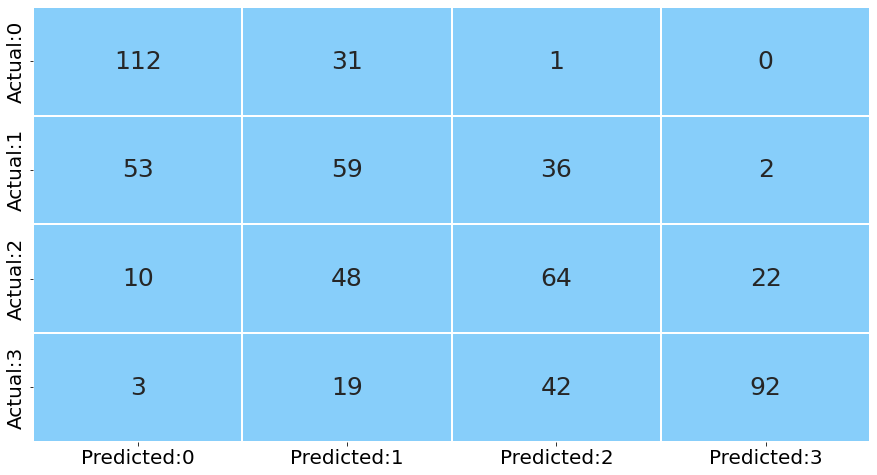

In [33]:
# call the function to plot the confusion matrix
# pass the knn model to the function
plot_confusion_matrix(knn_model)

**Calculate performance measures on the test set.**

In [34]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the knn model to the function
test_report = get_test_report(knn_model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.63      0.78      0.70       144
           1       0.38      0.39      0.38       150
           2       0.45      0.44      0.45       144
           3       0.79      0.59      0.68       156

    accuracy                           0.55       594
   macro avg       0.56      0.55      0.55       594
weighted avg       0.56      0.55      0.55       594



**Interpretation:** The accuracy is 55% for this model.

<a id="hyper"></a>
## 5.1 Optimal Value of K (using GridSearchCV)

In [35]:
# create a dictionary with hyperparameters and its values
# n_neighnors: number of neighbors to consider
# usually, we consider the odd value of 'n_neighnors' to avoid the equal number of nearest points with more than one class
# pass the different distance metrics to the parameter, 'metric'
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
 
# instantiate the 'KNeighborsClassifier' 
knn_classification = KNeighborsClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the knn model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
# scoring: pass the scoring parameter 'accuracy'
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')

# fit the model on X_train and y_train using fit()
knn_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'manhattan', 'n_neighbors': 21} 



**Calculate performance measures on the test set.**

In [36]:
# print the performance measures for test set for the model with best parameters
# call the function 'get_test_report'
# pass the knn model using GridSearch to the function
print('Classification Report for test set: \n', get_test_report(knn_grid))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.77      0.87      0.82       144
           1       0.64      0.60      0.62       150
           2       0.59      0.67      0.62       144
           3       0.87      0.71      0.78       156

    accuracy                           0.71       594
   macro avg       0.72      0.71      0.71       594
weighted avg       0.72      0.71      0.71       594



**Interpretation:** The accuracy is 71% for this model.

**Kappa score for knn_model**

In [37]:
y_pred = knn_model.predict(X_test)

In [38]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.40144018477842447


**Interpretation:** As, the kappa score for the KNN model is 0.4014, we can say that there is fair agrrement between the actual and predicted values.

**Kappa score tuned KNN model i.e. knn_grid**

In [39]:
y_pred = knn_grid.predict(X_test)

In [40]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.6121164081078021


In [1]:
S1 = {1,2,3,4,5}
S2 = {4,5,6,7,8}
print(S1 & S2)

{4, 5}


**Interpretation:** As, the kappa score for the tuned KNN model is 0.6121, we can say that there is substantial agrrement between the actual and predicted values. The tuned knn model with k=21 is better than the knn model with k=3.

In [2]:
a = b ='True'
if (a and b):
    print("Hello")
else:
    print("World")

Hello


In [4]:
tuple= ('google',1,'amazon',2,'microsoft',3)

In [6]:
tuple[6]

IndexError: tuple index out of range